In [ ]:
# This troubleshoots NaNs and other issues when applying an MCMC posterior 
# of the RRL calibration to EW data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [44]:
def feh_layden(coeff_a,coeff_b,coeff_c,coeff_d,H,K):
    '''
    Finds Fe/H given equivalent widths (in angstroms), from
    K = a + b*H + c*[Fe/H] + d*H*[Fe/H]  (Layden 1994 Eqn. 7)
    '''

    feh = np.divide(np.subtract(K,np.subtract(coeff_a,np.multiply(coeff_b,H))),
                    np.add(coeff_c,np.multiply(coeff_d,H)))

    return feh

In [45]:
def feh_layden_vector(coeff_a,coeff_b,coeff_c,coeff_d,H,K):
    '''
    Finds Fe/H given equivalent widths (in angstroms), from
    K = a + b*H + c*[Fe/H] + d*H*[Fe/H]  (Layden 1994 Eqn. 7)
    '''

    feh = np.divide(np.subtract(K,np.subtract(coeff_a,np.multiply(coeff_b,H))),
                    np.add(coeff_c,np.multiply(coeff_d,H)))

    return feh

In [14]:
def feh_abcdfghk(coeff_a,coeff_b,coeff_c,coeff_d,coeff_f,coeff_g,coeff_h,coeff_k,H,K):
    '''
    Finds Fe/H given equivalent widths (in angstroms), from
    K = a + b*H + c*[Fe/H] + d*H*[Fe/H] + f*(H^2) + g*([Fe/H]^2) + h*(H^2)*[Fe/H] + k*H*([Fe/H]^2)
    '''
    
    

    A_cap = coeff_g + coeff_k*H
    B_cap = coeff_c + coeff_d*H + coeff_h*np.power(H,2)
    C_cap = coeff_a + coeff_b*H + coeff_f*np.power(H,2) - K
    # since this involves a quadratic, there are two roots
    F_pos = np.divide(-np.add(
                            B_cap,
                              np.sqrt(
                                            np.subtract(np.power(B_cap,2.),
                                                        4*np.multiply(A_cap,C_cap))
                                           )
                             ),
                      2*A_cap)
    print(F_pos)
    F_neg = np.divide(-np.subtract(
                                B_cap,
                                np.sqrt(
                                            np.subtract(np.power(B_cap,2.),
                                                             4*np.multiply(A_cap,C_cap))
                                            )),
                      2*A_cap)
    print(F_neg)
    
    return F_pos, F_neg

In [15]:
def feh_abcdfghk_vector(coeff_a,coeff_b,coeff_c,coeff_d,coeff_f,coeff_g,coeff_h,coeff_k,H,K):
    '''
    Finds Fe/H given equivalent widths (in angstroms), from
    K = a + b*H + c*[Fe/H] + d*H*[Fe/H] + f*(H^2) + g*([Fe/H]^2) + h*(H^2)*[Fe/H] + k*H*([Fe/H]^2)
    '''
    
    

    A_cap = np.add(coeff_g,np.multiply(coeff_k,H))
    B_cap = np.add(coeff_c,np.add(np.multiply(coeff_d,H),np.multiply(coeff_h,np.power(H,2))))
    C_cap = np.add(coeff_a,np.add(np.multiply(coeff_b,H),np.subtract(np.multiply(coeff_f,np.power(H,2)),K)))
    # since this involves a quadratic, there are two roots
    F_pos = np.divide(-np.add(
                            B_cap,
                              np.sqrt(
                                            np.subtract(np.power(B_cap,2.),
                                                        4*np.multiply(A_cap,C_cap))
                                           )
                             ),
                      np.multiply(2,A_cap))
    print(F_pos)
    F_neg = np.divide(-np.subtract(
                                B_cap,
                                np.sqrt(
                                            np.subtract(np.power(B_cap,2.),
                                                             4*np.multiply(A_cap,C_cap))
                                            )),
                      np.multiply(2,A_cap))
    print(F_neg)
    
    return F_pos, F_neg

In [38]:
def K_abcd(coeff_a,coeff_b,coeff_c,coeff_d,H,feh):
    '''
    Function to find K (using old Layden calib), for checking
    '''
    
    K = coeff_a + coeff_b*H + coeff_c*feh + coeff_d*H*feh
    
    return K

In [16]:
def K_abcdfghk(coeff_a,coeff_b,coeff_c,coeff_d,coeff_f,coeff_g,coeff_h,coeff_k,H,feh):
    '''
    Function to find K, for checking
    '''
    
    K = coeff_a + coeff_b*H + coeff_c*feh + coeff_d*H*feh + coeff_f*(H**2) + \
        coeff_g*(feh**2) + coeff_h*(H**2)*feh + coeff_k*H*(feh**2)
    
    return K

In [39]:
coeff_array = np.array([24.869157416385207,-2.582957004882373,12.597091229918172,
                        -1.0902583910404404,0.07976261001151297,1.5780487338599027,
                       0.025617935328091444,-0.08834693987583538])
H_test = 12.35339436489356
feh_test = -1.3
K_test_1 = K_abcdfghk(coeff_array[0],coeff_array[1],coeff_array[2],coeff_array[3],
                  coeff_array[4],coeff_array[5],coeff_array[6],coeff_array[7],H=H_test,feh=feh_test)
K_Layden_test_1 = K_abcd(coeff_array[0],coeff_array[1],coeff_array[2],coeff_array[3],H=H_test,feh=feh_test)

In [58]:
K_test_1

2.0060075388152137

In [37]:
a_array = [24.869157416385207,24.869157416385207]
b_array = [-2.582957004882373,-2.582957004882373]
c_array = [12.597091229918172,12.597091229918172]
d_array = [-1.0902583910404404,-1.0902583910404404]
f_array = [0.07976261001151297,0.07976261001151297]
g_array = [1.5780487338599027,1.5780487338599027]
h_array = [0.025617935328091444,0.025617935328091444]
k_array = [-0.08834693987583538,-0.08834693987583538]

In [28]:
feh_test_1 = feh_abcdfghk(coeff_array[0],coeff_array[1],coeff_array[2],coeff_array[3],
                  coeff_array[4],coeff_array[5],coeff_array[6],coeff_array[7],H=H_test,K=K_test_1)

-4.942824880305222
-1.3000000000000012


In [46]:
feh_Layden_test_1 = feh_layden(coeff_array[0],coeff_array[1],coeff_array[2],coeff_array[3],H=H_test,K=K_test_1)

In [47]:
feh_Layden_test_1

62.86169690935826

In [30]:
feh_test_array = feh_abcdfghk_vector(a_array,b_array,c_array,d_array,
                  f_array,g_array,h_array,k_array,H=H_test,K=K_test_1)

         c         
-------------------
 -4.806624548096502
 -5.272864962592088
 -4.951685603296217
 -4.923521626724345
 -4.925739742931166
-4.8615298051629425
 -4.699960345367154
 -4.825051640342426
 -5.019905648372045
 -4.919927185703218
                ...
 -5.142669314963889
 -4.856067473145262
 -4.781251973517741
 -4.896614041348023
 -5.558050357792706
 -4.851379570926765
 -4.649334576353057
 -4.773492074464888
 -4.881627891604153
  -4.69642142774316
 -4.623426718023312
Length = 4800000 rows
         c         
-------------------
-1.3008884389600108
-1.3155806205858174
-1.3230907547812303
 -1.318305570857748
 -1.305372863906997
 -1.290003955903883
-1.3062689949520767
-1.3146114910589553
-1.3161058947879276
-1.3185421391727405
                ...
-1.3219503625858062
-1.3103235828070432
 -1.252366446089165
-1.3055494160364312
-1.3239121986736495
-1.3166939926136956
-1.3013878685328215
-1.3222207852860828
-1.3203068060684973
-1.2978953622990854
 -1.289887242504476
Length = 4800000 r

In [48]:
feh_layden_test_array = feh_layden_vector(a_array,b_array,c_array,d_array,H=H_test,K=K_test_1)

In [49]:
feh_layden_test_array

132.75979835595464
53.52722483207651
70.71782794328273
42.266334568695484
93.773208651365
51.39870306642907
60.191446759755344
68.3767990072219
74.90607803213183
53.94354930203832
35.79318364994522


In [50]:
# read in an actual solution and apply posteriors

stem = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity"
file_name = stem + "/src/calib_solution_abcdfghk_20211118.fits"
mcmc_chain = Table.read(file_name, hdu=1)

In [51]:
a_array = mcmc_chain["a"]
b_array = mcmc_chain["b"]
c_array = mcmc_chain["c"]
d_array = mcmc_chain["d"]
f_array = mcmc_chain["f"]
g_array = mcmc_chain["g"]
h_array = mcmc_chain["h"]
k_array = mcmc_chain["k"]

feh_test_array = feh_abcdfghk_vector(a_array,b_array,c_array,d_array,
                  f_array,g_array,h_array,k_array,H=H_test,K=K_test_1)

feh_layden_test_array = feh_layden_vector(a_array,b_array,c_array,d_array,H=H_test,K=K_test_1)

         c         
-------------------
 -4.806624548096502
 -5.272864962592088
 -4.951685603296217
 -4.923521626724345
 -4.925739742931166
-4.8615298051629425
 -4.699960345367154
 -4.825051640342426
 -5.019905648372045
 -4.919927185703218
                ...
 -5.142669314963889
 -4.856067473145262
 -4.781251973517741
 -4.896614041348023
 -5.558050357792706
 -4.851379570926765
 -4.649334576353057
 -4.773492074464888
 -4.881627891604153
  -4.69642142774316
 -4.623426718023312
Length = 4800000 rows
         c         
-------------------
-1.3008884389600108
-1.3155806205858174
-1.3230907547812303
 -1.318305570857748
 -1.305372863906997
 -1.290003955903883
-1.3062689949520767
-1.3146114910589553
-1.3161058947879276
-1.3185421391727405
                ...
-1.3219503625858062
-1.3103235828070432
 -1.252366446089165
-1.3055494160364312
-1.3239121986736495
-1.3166939926136956
-1.3013878685328215
-1.3222207852860828
-1.3203068060684973
-1.2978953622990854
 -1.289887242504476
Length = 4800000 r

In [54]:
feh_layden_test_array

132.75979835595464
53.52722483207651
70.71782794328273
42.266334568695484
93.773208651365
51.39870306642907
60.191446759755344
68.3767990072219
74.90607803213183
53.94354930203832
35.79318364994522


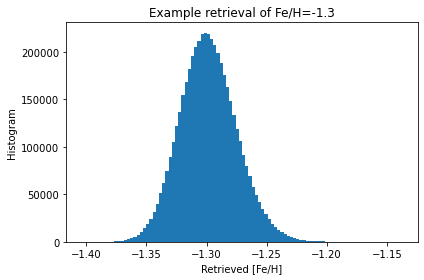

In [57]:
plt.hist(feh_test_array[1], bins=100)
plt.title("Example retrieval of Fe/H=-1.3")
plt.xlabel("Retrieved [Fe/H]")
plt.ylabel("Histogram")
plt.tight_layout()
plt.savefig("junk.pdf")

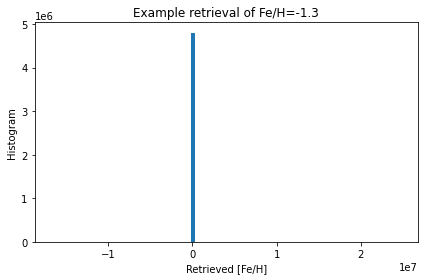

In [55]:
plt.clf()
plt.hist(feh_layden_test_array, bins=100)
plt.title("Example retrieval of Fe/H=-1.3")
plt.xlabel("Retrieved [Fe/H]")
plt.ylabel("Histogram")
plt.tight_layout()
plt.savefig("junk.pdf")